YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0809
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0010
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.5918e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 5.2110e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 5.5057e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.1790e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 4.9156e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 5.0821e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 5.1687e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 5.1133e-04
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


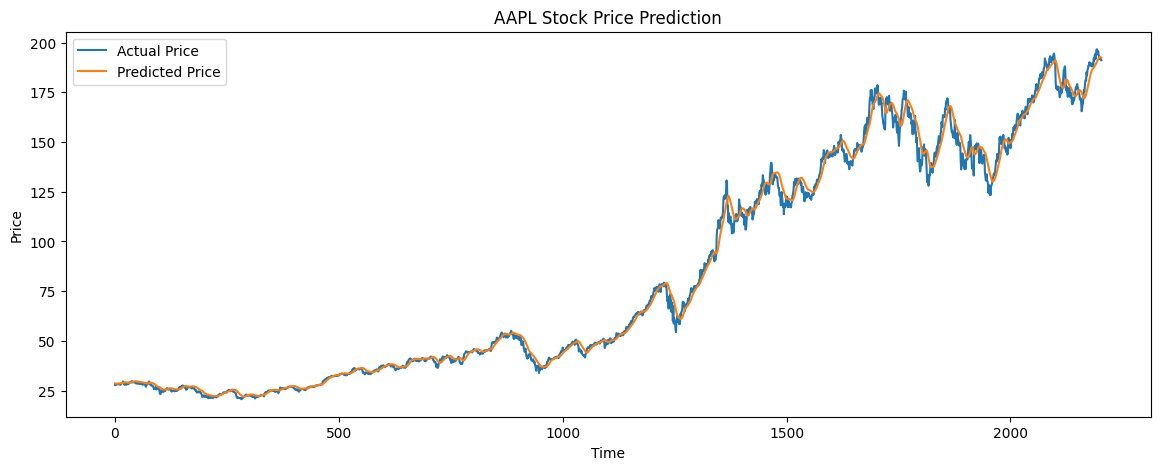

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 1. Download stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2023-12-31')
df = df[['Close']]

# 2. Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 3. Create training data
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 4. Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the model
model.fit(X, y, batch_size=64, epochs=10)

# 6. Predict and visualize
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y.reshape(-1, 1))

plt.figure(figsize=(14, 5))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()